In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import pymysql

# Loading the Data

In [2]:
# Establishing connection to the db
try:
    conn = pymysql.connect(
        host = 'localhost',
        database = 'sakila', 
        user = 'root', 
        password = '365pass')
    
except:
    print('Error connecting to the databse')
        
else:
    print('Connected to the Sakila database')


Connected to the Sakila database


In [3]:
# Query tested on MySQL to retrive data for analysis
myQuery = '''
SELECT 
	film.title, film.rental_rate, film.replacement_cost, film.rating, 
    store.store_id,
    address.district, city.city, country.country,
    rental.rental_id, DATE(rental.rental_date) AS rental_date, DATE(rental.return_date) AS return_date,
    datediff(DATE(rental.return_date), DATE(rental.rental_date)) AS rental_duration,
    payment.amount,
    customer.customer_id, customer.first_name, customer.last_name, customer.email,
    concat(customer.first_name, ' ', customer.last_name) AS customer_full_name
    
FROM 
	inventory
		INNER JOIN
    film ON inventory.film_id = film.film_id
		INNER JOIN
	store ON inventory.store_id = store.store_id
		INNER JOIN
	rental ON inventory.inventory_id = rental.inventory_id
		INNER JOIN
	address ON store.address_id = address.address_id
		INNER JOIN
	city ON address.city_id = city.city_id
		INNER JOIN
	country ON city.country_id = country.country_id
		INNER JOIN
	customer ON rental.customer_id = customer.customer_id
        INNER JOIN
    payment ON rental.rental_id = payment.rental_id;'''

In [4]:
# Executing SQL query
cursor = conn.cursor() 
cursor.execute(myQuery)
rows = cursor.fetchall()

# Converting the queried rows to a DataFrame
# DataFrames are more efficient and easier to make analysis

rows = np.asarray(rows)
columns = (['Film_Title', 'Film_Rental_Rate', 'Film_Replace_Cost', 'Film_Rating', 
            'Store_ID',
            'District', 'City', 'Country',
            'Rental_ID', 'Rental_Date', 'Rental_Return_Date',
            'Rental_Duration',
            'Payment_Amount',
            'Customer_ID','Customer_First_Name', 'Customer_Last_Name', 'Customer_Email', 'Customer_Full_Name'])
df = pd.DataFrame(rows, columns = columns)

# Closing the connection
cursor.close()
conn.close()

# OVERVIEW OF THE DATA

In [5]:
df.shape

(16044, 18)

DF has: 16044 rows and 15 columns

In [6]:
df.head()

,Film_Title,Film_Rental_Rate,Film_Replace_Cost,Film_Rating,Store_ID,District,City,Country,Rental_ID,Rental_Date,Rental_Return_Date,Rental_Duration,Payment_Amount,Customer_ID,Customer_First_Name,Customer_Last_Name,Customer_Email,Customer_Full_Name
0,ACADEMY DINOSAUR,0.99,20.99,PG,1,Alberta,Lethbridge,Canada,4863,2005-07-08,2005-07-11,3,0.99,431,JOEL,FRANCISCO,JOEL.FRANCISCO@sakilacustomer.org,JOEL FRANCISCO
1,ACADEMY DINOSAUR,0.99,20.99,PG,1,Alberta,Lethbridge,Canada,11433,2005-08-02,2005-08-11,9,3.99,518,GABRIEL,HARDER,GABRIEL.HARDER@sakilacustomer.org,GABRIEL HARDER
2,ACADEMY DINOSAUR,0.99,20.99,PG,1,Alberta,Lethbridge,Canada,14714,2005-08-21,2005-08-30,9,3.99,279,DIANNE,SHELTON,DIANNE.SHELTON@sakilacustomer.org,DIANNE SHELTON
3,ACADEMY DINOSAUR,0.99,20.99,PG,1,Alberta,Lethbridge,Canada,972,2005-05-30,2005-06-06,7,1.99,411,NORMAN,CURRIER,NORMAN.CURRIER@sakilacustomer.org,NORMAN CURRIER
4,ACADEMY DINOSAUR,0.99,20.99,PG,1,Alberta,Lethbridge,Canada,2117,2005-06-17,2005-06-23,6,0.99,170,BEATRICE,ARNOLD,BEATRICE.ARNOLD@sakilacustomer.org,BEATRICE ARNOLD


In [7]:
df.describe()

,Film_Title,Film_Rental_Rate,Film_Replace_Cost,Film_Rating,Store_ID,District,City,Country,Rental_ID,Rental_Date,Rental_Return_Date,Rental_Duration,Payment_Amount,Customer_ID,Customer_First_Name,Customer_Last_Name,Customer_Email,Customer_Full_Name
count,16044,16044,16044,16044,16044,16044,16044,16044,16044,16044,15861,15861,16044,16044,16044,16044,16044,16044
unique,958,3,21,5,2,2,2,2,16044,41,84,11,19,599,591,599,599,599
top,BUCKET BROTHERHOOD,0.99,22.99,PG-13,2,QLD,Woodridge,Australia,4863,2005-07-31,2005-08-04,7,4.99,148,MARION,HUNT,ELEANOR.HUNT@sakilacustomer.org,ELEANOR HUNT
freq,34,5652,1044,3585,8121,8121,8121,8121,1,679,534,1821,3789,46,68,46,46,46


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Film_Title           16044 non-null  object
 1   Film_Rental_Rate     16044 non-null  object
 2   Film_Replace_Cost    16044 non-null  object
 3   Film_Rating          16044 non-null  object
 4   Store_ID             16044 non-null  object
 5   District             16044 non-null  object
 6   City                 16044 non-null  object
 7   Country              16044 non-null  object
 8   Rental_ID            16044 non-null  object
 9   Rental_Date          16044 non-null  object
 10  Rental_Return_Date   15861 non-null  object
 11  Rental_Duration      15861 non-null  object
 12  Payment_Amount       16044 non-null  object
 13  Customer_ID          16044 non-null  object
 14  Customer_First_Name  16044 non-null  object
 15  Customer_Last_Name   16044 non-null  object
 16  Cust

We can see that Return_Date has 15861 Non-Null values. Let's verify how many Nulls there are.

In [9]:
count=0
for i in df['Rental_Return_Date']:
    if(i is None):
        count+=1
print(count)

183


In [10]:
15861+count

16044

So, we have 183 Null values that match with the 16044 when summed with 15861 Non-Null values.

This evidence means that 183 times people did not return the movies DVD. 

# Analyzing Numerical Fields

Let's analyze the data types of each field

In [11]:
df['Payment_Amount'].dtype

dtype('O')

Pandas freely uses object dtype when columns contain mixed values (strings, numbers, nan).

So we have to give each column its proper data type.

In [12]:
df['Film_Rental_Rate']    = pd.to_numeric(df['Film_Rental_Rate'])
df['Film_Replace_Cost']   = pd.to_numeric(df['Film_Replace_Cost'])
df['Rental_ID']           = pd.to_numeric(df['Rental_ID'])
df['Rental_Duration']     = pd.to_numeric(df['Rental_Duration'])
df['Payment_Amount']      = pd.to_numeric(df['Payment_Amount'])

In [13]:
df.describe()

,Film_Rental_Rate,Film_Replace_Cost,Rental_ID,Rental_Duration,Payment_Amount
count,16044.000000,16044.000000,16044.000000,15861.000000,16044.000000
mean,2.942630,20.215443,8025.371478,5.025219,4.201356
std,1.649678,6.081771,4632.777249,2.611835,2.362961
min,0.990000,9.990000,1.000000,0.000000,0.000000
25%,0.990000,14.990000,4013.750000,3.000000,2.990000
50%,2.990000,20.990000,8025.500000,5.000000,3.990000
75%,4.990000,25.990000,12037.250000,7.000000,4.990000
max,4.990000,29.990000,16049.000000,10.000000,11.990000


- The maximun payed amount was 11.99
- The average payed amount is 4.20
- The maximum rental duration was 10 days
- The average rental duration is 5 days
- The replacement cost for all the movies in between 29.99 and 9.99
- The average replacement cost is 20.22

<Axes: title={'center': 'Boxplot of Rental Duration (Days)'}>

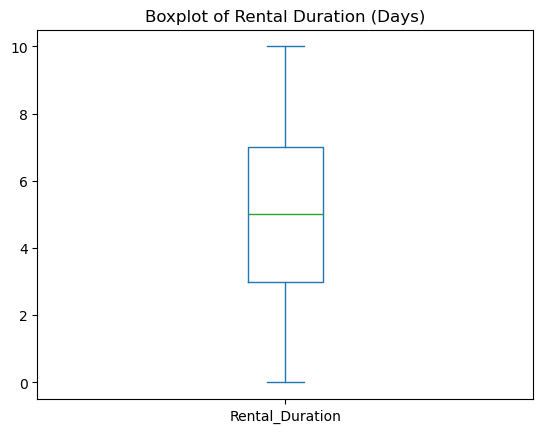

In [14]:
# Simple Boxplot graph
df['Rental_Duration'].plot(kind   = 'box',
                           title  = 'Boxplot of Rental Duration (Days)')

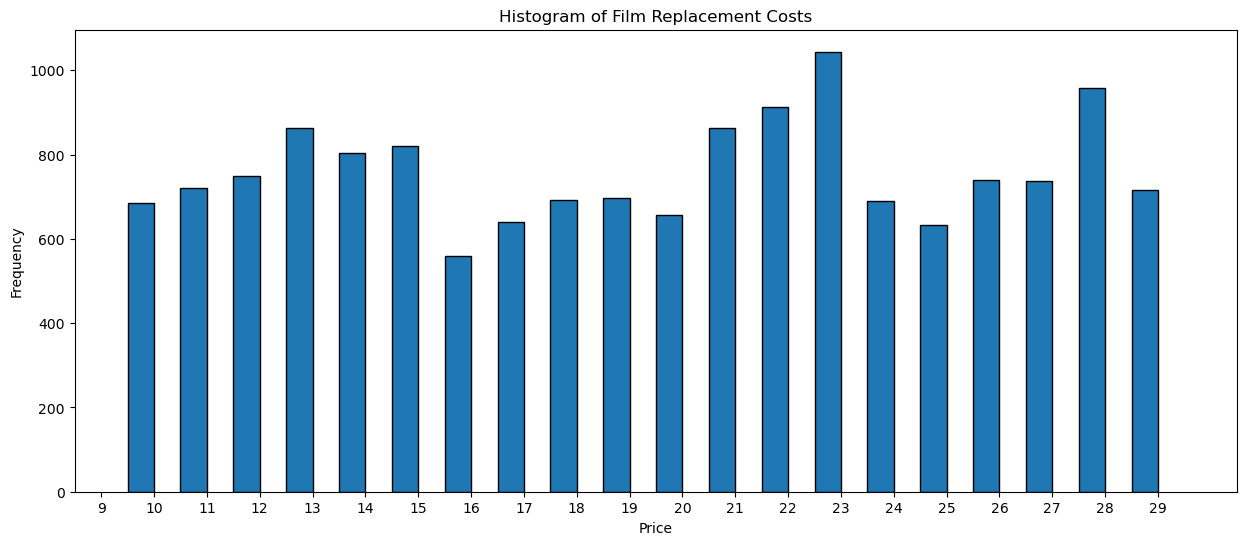

In [15]:
# Set figure dimensions
plt.figure(figsize=(15, 6))

# Calculate the bin edges
min_value = np.round(df['Film_Replace_Cost'].min())
max_value = math.floor(df['Film_Replace_Cost'].max())
bin_width = 1  
bin_edges = np.arange(min_value - bin_width, 
                      max_value + bin_width, 
                      bin_width)

# Plot histogram with actual counts and specified bin edges
plt.hist(df['Film_Replace_Cost'], 
         bins      = bin_edges, 
         align     = 'right', 
         width     = 0.50, 
         edgecolor = 'black')

# Set x-axis ticks to specific values
plt.xticks(bin_edges)

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Film Replacement Costs')

# Show plot
plt.show()

# Analizing Categorical Fields


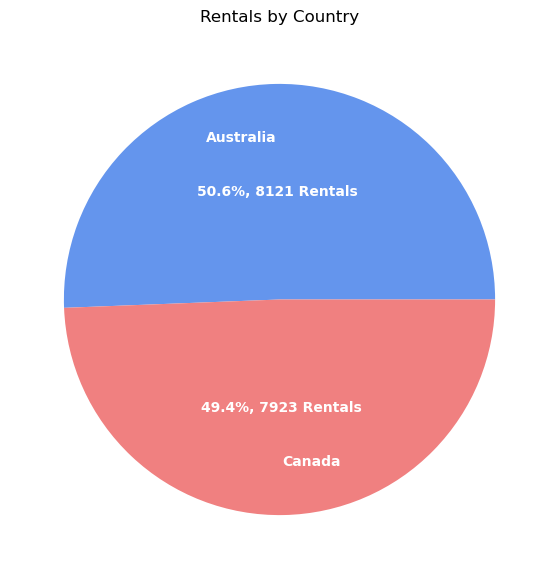

In [16]:
plt.figure(figsize = (7,7))

plt.pie(df['Country'].value_counts(),
        colors        = ['cornflowerblue','lightcoral'],
        autopct       = lambda p: '{:.1f}%, {:.0f} Rentals'.format(p, p * sum(df['Country'].value_counts()) / 100),
        pctdistance   = 0.50,
        textprops     = {'color': 'white',
                         'fontweight': 'bold'},
        labels        = ['Australia', 'Canada'],
        labeldistance = 0.75,
       )

plt.title('Rentals by Country')

plt.show()

<Axes: title={'center': 'Number of Films by Rating'}, xlabel='Number of Films', ylabel='Film Rating'>

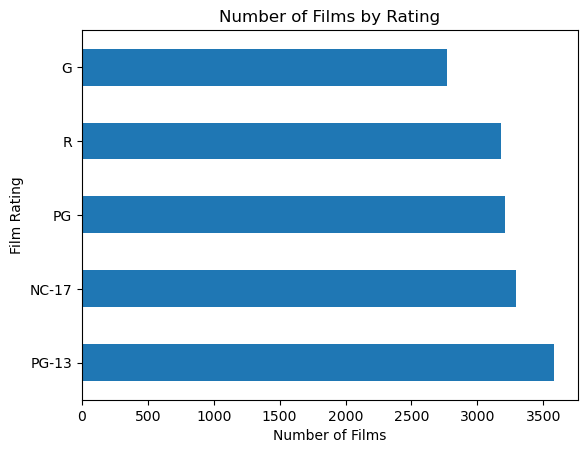

In [17]:
df['Film_Rating'].value_counts().plot(kind   = 'barh',                                      
                                      title  = 'Number of Films by Rating',
                                      xlabel = 'Number of Films',
                                      ylabel = 'Film Rating',
                                      rot    = 0
                                      )

<Axes: title={'center': 'Number of Rentals by Price'}, xlabel='Rental Rates', ylabel='Number of Films'>

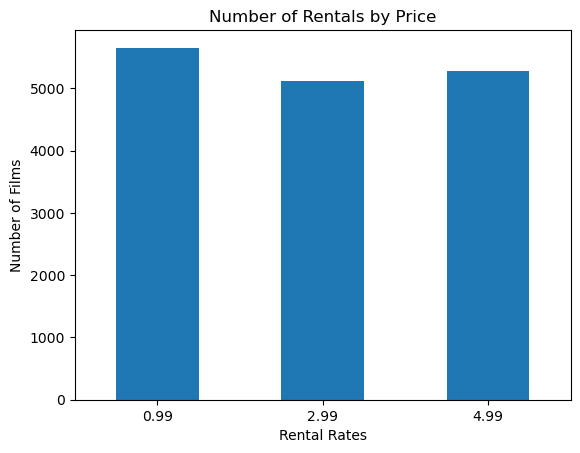

In [18]:
df['Film_Rental_Rate'].value_counts().sort_index().plot(kind  = 'bar',
                                                       title  = 'Number of Rentals by Price',
                                                       ylabel = 'Number of Films',
                                                       xlabel = 'Rental Rates',
                                                       rot    = 0
                                                       )

# Objetive 1 - Identify the most active Customers based on Rentals

In [37]:
Top = 10

Data = {
        'Customer Full Name': df['Customer_Full_Name'].value_counts().head(Top).index,
        'Rental Counts':      df['Customer_Full_Name'].value_counts().head(Top).values}

TopCustomersDP = pd.DataFrame(Data)
TopCustomersDP.set_index('Customer Full Name', inplace = True)
TopCustomersDP


,Rental Counts
Customer Full Name,
ELEANOR HUNT,46
KARL SEAL,45
MARCIA DEAN,42
CLARA SHAW,42
TAMMY SANDERS,41
SUE PETERS,40
WESLEY BULL,40
RHONDA KENNEDY,39
TIM CARY,39


<Axes: ylabel='Customer Full Name'>

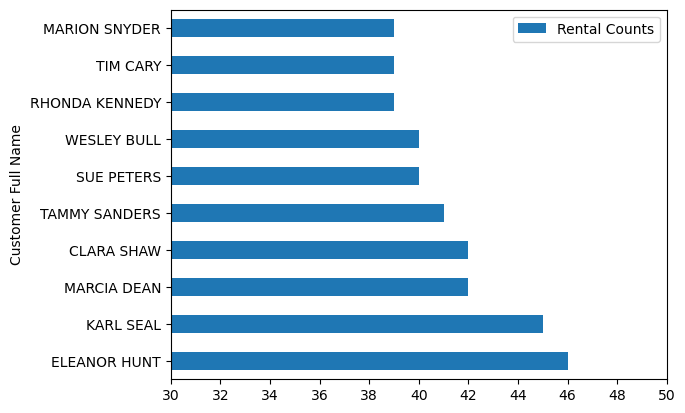

In [49]:
TopCustomersDP.plot.barh(xlim   = (30,50),
                         xticks = range(30,51,2))

# Objetive 2 - Identify which Country has more sales

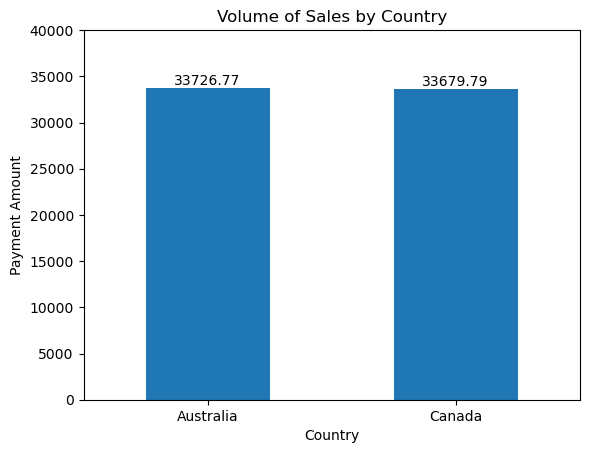

In [21]:
# Group by Country the sum of Payment_Amount
grouped_df = df.groupby('Country')['Payment_Amount'].sum()

grouped_plot = grouped_df.plot.bar(rot = 0,
                                   ylabel = 'Payment Amount',
                                   title = 'Volume of Sales by Country',
                                   ylim = (0,40000))
# Add text labels to each bar
for i, v in enumerate(grouped_df):
    grouped_plot.text(i, v, f'{v:.2f}', ha='center', va='bottom')
    

# Objetive 3 - Identify which films are more rented and have high volume of sales

In [22]:
# Group by Country the sum of Payment_Amount
grouped_films_df = df.groupby('Film_Title')['Payment_Amount'].sum()

In [23]:
# Calculate the Number of Rentals of each Movie
movie_counts = df['Film_Title'].value_counts()

In [24]:
# Merge the Payment_Amount and the Value_Counts on Film_Title
merged_df = pd.merge(grouped_films_df, movie_counts, on = 'Film_Title', how = 'inner')

# Changing the name of the columns
merged_df.rename(columns = {'Film_Title': 'Film_Title', 'count': 'Film_Count'}, inplace = True)

merged_df

,Payment_Amount,Film_Count
Film_Title,,
ACADEMY DINOSAUR,36.77,23
ACE GOLDFINGER,52.93,7
ADAPTATION HOLES,37.88,12
AFFAIR PREJUDICE,91.77,23
AFRICAN EGG,51.88,12
...,...,...
YOUNG LANGUAGE,6.93,7
YOUTH KICK,16.94,6
ZHIVAGO CORE,14.91,9


In [25]:
# The Top 10 most paied films based on Payment_Amount
merged_df.sort_values('Payment_Amount', ascending = False).head(10)

,Payment_Amount,Film_Count
Film_Title,,
TELEGRAPH VOYAGE,231.73,27
WIFE TURN,223.69,31
ZORRO ARK,214.69,31
GOODFELLAS SALUTE,209.69,31
SATURDAY LAMBS,204.72,28
TITANS JERK,201.71,29
TORQUE BOUND,198.72,27
HARRY IDAHO,195.70,30
INNOCENT USUAL,191.74,26


In [63]:
# The Top 10 most rented movies based on Number of Rentals
merged_df.sort_values('Film_Count', ascending = False).head(10)


,Payment_Amount,Film_Count
Film_Title,,
BUCKET BROTHERHOOD,180.66,34
ROCKETEER MOTHER,116.67,33
RIDGEMONT SUBMARINE,130.68,32
GRIT CLOCKWORK,110.68,32
JUGGLER HARDLY,96.68,32
FORWARD TEMPLE,128.68,32
SCALAWAG DUCK,172.68,32
ZORRO ARK,214.69,31
TIMBERLAND SKY,123.69,31


Text(0, 0.5, 'Film Title')

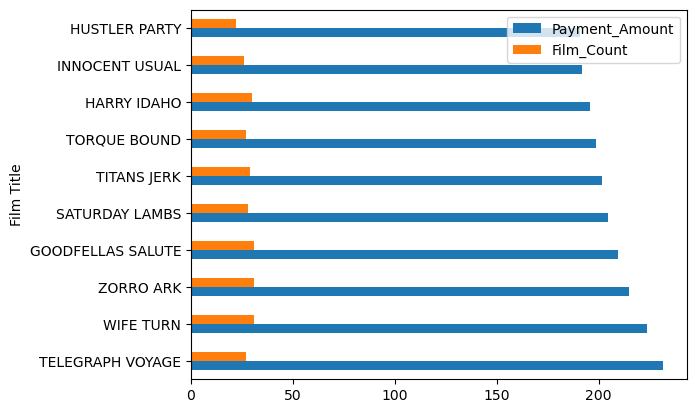

In [68]:
ax = merged_df.sort_values('Payment_Amount', ascending = False).head(10)
ax.plot.barh()
plt.ylabel('Film Title')
plt.title('Payment Amount and Cou')